<a href="https://colab.research.google.com/github/BossBosssmile/BADS7105_CRM_Analytics/blob/main/Customer_Segmentation_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Load Dependencies**

In [ ]:
!pip install pycaret

     |████████████████████████████████| 288 kB 5.3 MB/s 
     |████████████████████████████████| 1.7 MB 34.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.3 MB 26.8 MB/s 
     |████████████████████████████████| 261 kB 45.5 MB/s 
     |████████████████████████████████| 56 kB 3.3 MB/s 
     |████████████████████████████████| 15.5 MB 41.5 MB/s 
     |████████████████████████████████| 167 kB 41.9 MB/s 
     |████████████████████████████████| 113 kB 42.2 MB/s 
     |████████████████████████████████| 86 kB 5.0 MB/s 
     |████████████████████████████████| 6.8 MB 16.2 MB/s 
     |████████████████████████████████| 2.0 MB 39.5 MB/s 
     |████████████████████████████████| 303 kB 46.4 MB/s 
     |████████████████████████████████| 3.1 MB 36.0 MB/s 
     |████████████████████████████████| 675 kB 44.2 MB/s 
     |█████████████████

In [ ]:
import pandas as pd
from pycaret.clustering import *

# **Load Data**

In [ ]:
df = pd.read_csv('Supermarket Data.csv')

In [ ]:
df['SHOP_DATE'] = df['SHOP_DATE'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))

opening time 8.00am-21.00pm

defined two column are early morning(8-12.59) and early evening(13.00-21.00) 

In [ ]:
df['early_morning'] = np.where(np.logical_and(df['SHOP_HOUR'] >= 8,df['SHOP_HOUR'] < 13),1,0)
df['early_evening'] = np.where(np.logical_and(df['SHOP_HOUR'] >= 13,df['SHOP_HOUR'] <= 21),1,0)

In [ ]:
df.tail(5)

,SHOP_WEEK,SHOP_DATE,SHOP_WEEKDAY,SHOP_HOUR,QUANTITY,SPEND,PROD_CODE,PROD_CODE_10,PROD_CODE_20,PROD_CODE_30,PROD_CODE_40,CUST_CODE,CUST_PRICE_SENSITIVITY,CUST_LIFESTAGE,BASKET_ID,BASKET_SIZE,BASKET_PRICE_SENSITIVITY,BASKET_TYPE,BASKET_DOMINANT_MISSION,STORE_CODE,STORE_FORMAT,STORE_REGION,early_morning,early_evening
73813,200811,2008-05-10,7,18,1,5.51,PRD0900589,CL00195,DEP00067,G00021,D00005,CUST0000615547,UM,YA,9.941109e+14,L,MM,Full Shop,Mixed,STORE00001,LS,E02,0,1
73814,200732,2007-10-01,2,15,1,5.51,PRD0900589,CL00195,DEP00067,G00021,D00005,CUST0000414514,MM,OT,9.941078e+14,L,MM,Full Shop,Mixed,STORE00001,LS,E02,0,1
73815,200620,2006-07-15,7,13,1,5.51,PRD0900589,CL00195,DEP00067,G00021,D00005,CUST0000138092,LA,OF,9.941014e+14,M,MM,Small Shop,Mixed,STORE00001,LS,E02,0,1
73816,200734,2007-10-15,2,17,1,5.51,PRD0900589,CL00195,DEP00067,G00021,D00005,CUST0000312034,MM,YF,9.941080e+14,L,MM,Top Up,Fresh,STORE00001,LS,E02,0,1
73817,200650,2007-02-06,3,12,1,5.51,PRD0900589,CL00195,DEP00067,G000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0


In [ ]:
df.info

<bound method DataFrame.info of        SHOP_WEEK  SHOP_DATE  SHOP_WEEKDAY  SHOP_HOUR  QUANTITY  SPEND  \
0         200732 2007-10-05             6         17         3   6.75   
1         200733 2007-10-10             4         20         3   6.75   
2         200741 2007-12-09             1         11         1   2.25   
3         200731 2007-09-29             7         17         1   2.25   
4         200737 2007-11-10             7         14         3   6.75   
...          ...        ...           ...        ...       ...    ...   
73813     200811 2008-05-10             7         18         1   5.51   
73814     200732 2007-10-01             2         15         1   5.51   
73815     200620 2006-07-15             7         13         1   5.51   
73816     200734 2007-10-15             2         17         1   5.51   
73817     200650 2007-02-06             3         12         1   5.51   

        PROD_CODE PROD_CODE_10 PROD_CODE_20 PROD_CODE_30 PROD_CODE_40  \
0      PRD0900001 

# **Prepare customer single view**

# Define features

Total visits = COUNT(DISTINCT BASKET ID)

Ticket size = SUM(SPEND)/COUNT(DISTINCT BASKET ID)

Total no. of SKUs

Earlymorning%= % shopping period 8.00-12.59

Earlyevening%= % shopping period 13.00-21.00

# Calculate features

In [ ]:
##prepare customer single view
df_csv = df_groupby = df[df['CUST_CODE'].notnull()].groupby(by=['CUST_CODE']).agg(TotalSpend=('SPEND', 'sum'),
                                                                                  TotalVisits=('BASKET_ID', 'nunique'),
                                                                                  TotalSKUs=('PROD_CODE', 'nunique'),
                                                                                  FirstDate=('SHOP_DATE', 'min'),
                                                                                  LastDate=('SHOP_DATE', 'max'),
                                                                                  Earlymorning=('early_morning', 'sum'),
                                                                                  Earlyevening=('early_evening', 'sum')
                                                                                  ).reset_index()

In [ ]:
##calculate ticket size
df_csv['TicketSize'] = df_csv['TotalSpend']/df_csv['TotalVisits']

In [ ]:
##find max date in the dataset
max_date = df_csv['LastDate'].max()

In [ ]:
##calculate total days of the relationship
df_csv['total_days'] = (df_csv['LastDate'] - df_csv['FirstDate']).dt.days + 1

In [ ]:
##calculate recency days
df_csv['recency'] = (max_date - df_csv['LastDate']).dt.days

In [ ]:
df_csv['Early_morning'] = (df_csv['Earlymorning'])/(df_csv['Earlymorning'] + df_csv['Earlyevening'])

In [ ]:
df_csv['Early_evening'] = (df_csv['Earlyevening'])/(df_csv['Earlymorning'] + df_csv['Earlyevening'])

In [ ]:
df_csv.head(5)

,CUST_CODE,TotalSpend,TotalVisits,TotalSKUs,FirstDate,LastDate,Earlymorning,Earlyevening,TicketSize,total_days,recency,Early_morning,Early_evening
0,CUST0000000689,37.60,11,16,2007-07-22,2008-06-23,7,17,3.418182,338,13,0.291667,0.708333
1,CUST0000001163,5.92,2,6,2006-10-22,2007-02-10,0,6,2.960000,112,512,0.000000,1.000000
2,CUST0000001194,207.69,55,48,2006-04-22,2008-06-17,1,104,3.776182,788,19,0.009524,0.990476
3,CUST0000002605,1.80,6,1,2006-10-08,2008-06-12,2,4,0.300000,614,24,0.333333,0.666667
4,CUST0000002637,26.75,9,8,2006-08-03,2008-04-14,1,13,2.972222,621,83,0.071429,0.928571


# **Cluster customers**

In [ ]:
exp_clu = setup(data=df_csv, ignore_features=['CUST_CODE','FirstDate', 'LastDate', 'Earlymorning', 'Earlyevening'], normalize=True)

,Description,Value
0,session_id,3082
1,Original Data,"(2328, 13)"
2,Missing Values,False
3,Numeric Features,8
4,Categorical Features,0
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(2328, 8)"
9,CPU Jobs,-1


In [ ]:
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch
kmodes,K-Modes Clustering,kmodes.kmodes.KModes


In [ ]:
get_metrics()

,Name,Display Name,Score Function,Scorer,Target,Args,Greater is Better,Needs Ground Truth,Custom
ID,,,,,,,,,
silhouette,Silhouette,Silhouette,<function silhouette_score at 0x7f0f8847db00>,make_scorer(silhouette_score),pred,{},True,False,False
chs,Calinski-Harabasz,Calinski-Harabasz,<function calinski_harabasz_score at 0x7f0f884...,make_scorer(calinski_harabasz_score),pred,{},True,False,False
db,Davies-Bouldin,Davies-Bouldin,<function davies_bouldin_score at 0x7f0f8847de60>,make_scorer(davies_bouldin_score),pred,{},True,False,False
hs,Homogeneity Score,Homogeneity,<function homogeneity_score at 0x7f0f8845db90>,make_scorer(homogeneity_score),pred,{},True,True,False
ari,Rand Index,Rand Index,<function adjusted_rand_score at 0x7f0f8845d950>,make_scorer(adjusted_rand_score),pred,{},True,True,False
cs,Completeness Score,Completeness,<function completeness_score at 0x7f0f8845dc20>,make_scorer(completeness_score),pred,{},True,True,False


# Compare model performance

In [ ]:
metrics = []
for model in models().index:
    if model in ['meanshift', 'optics']:
        continue
    create_model(model)
    metric_result = pull()
    metric_result['model'] = model
    metrics.append(metric_result)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,-0.1308,32.0887,8.0291,0,0,0


In [ ]:
cluster_metrics = pd.concat(metrics)
cluster_metrics.set_index("model", inplace=True)
cluster_metrics.sort_values(by='Silhouette', ascending=False, inplace=True)
cluster_metrics.style.highlight_max(subset=['Silhouette', 'Calinski-Harabasz'], color = 'green', axis = 0).highlight_min(subset=['Davies-Bouldin'], color = 'green', axis = 0)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
model,,,,,,
sc,0.612700,50.648000,0.466400,0,0,0
kmeans,0.371100,1210.554400,0.950500,0,0,0
hclust,0.334300,1096.951400,0.994000,0,0,0
birch,0.290700,425.922300,1.126700,0,0,0
ap,0.000000,0.000000,0.000000,0,0,0
kmodes,-0.130800,32.088700,8.029100,0,0,0
dbscan,-0.166300,97.417300,1.370900,0,0,0


# Spectral Clustering Clustering

In [ ]:
sc = create_model('sc')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6127,50.648,0.4664,0,0,0


In [ ]:
plot_model(sc)

# KMeans Clustering

In [ ]:
kmeans = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3711,1210.5544,0.9505,0,0,0


In [ ]:
print(kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=3082, tol=0.0001, verbose=0)


In [ ]:
plot_model(kmeans)

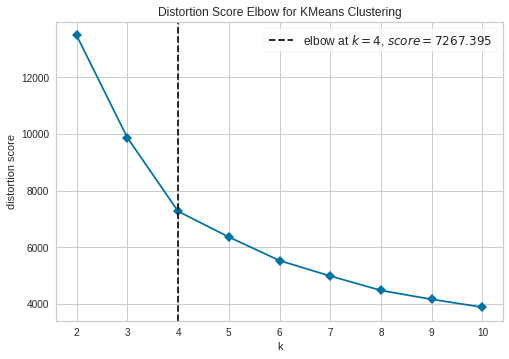

In [ ]:
plot_model(kmeans, plot = 'elbow')

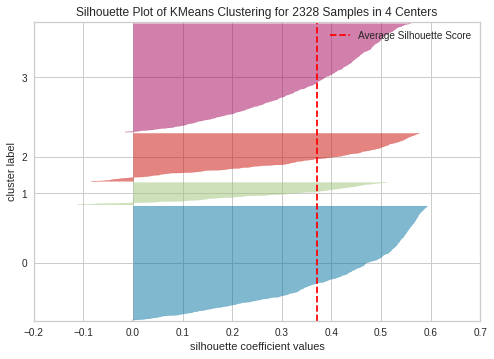

In [ ]:
plot_model(kmeans, plot = 'silhouette')

## https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

# **Interpret results and plan for actions**

cluster 0 นักท่องเที่ยวขี้เซา ที่จะเห็นช่วงเย็นแวะมาไม่ซ้ำ ซื้อของจุกจิกพวกน้ำเปล่าน้ำอัดลม ทำcosselling กับpromotion เพื่อดึงให้กลุ่มนี้ใช้เงินเพิ่มมากขึ้น

cluster  1 แม่บ้านนักช็อป กลุ่มนี้น่าจะเป็นmemberของร้านจัดทำระดับmemberพร้อมสิทธิพิเศษของแต่ละขั้นและทำcoupon ยิ่งช็อปเยอะชิ่งลดเยอะ ทำupperselling

cluster 2 สัญจรยามเช้า หรืออาจเป็นคนที่เคยมาช่วงเย็นแล้วมาอีกทีช่วงเช้า ทำcosselling กับpromotion 

cluster 3 หนุ่มสาวชาวออฟฟิศ ชวนทำmember ให้สิทธิพิเศษกับคนสมัครใหม่ ทำpromotionสำหรับสมาชิกเก่า

In [ ]:
kmeans_results = assign_model(kmeans)

In [ ]:
kmeans_results.head(5)

,CUST_CODE,TotalSpend,TotalVisits,TotalSKUs,FirstDate,LastDate,Earlymorning,Earlyevening,TicketSize,total_days,recency,Early_morning,Early_evening,Cluster
0,CUST0000000689,37.60,11,16,2007-07-22,2008-06-23,7,17,3.418182,338,13,0.291667,0.708333,Cluster 3
1,CUST0000001163,5.92,2,6,2006-10-22,2007-02-10,0,6,2.960000,112,512,0.000000,1.000000,Cluster 0
2,CUST0000001194,207.69,55,48,2006-04-22,2008-06-17,1,104,3.776182,788,19,0.009524,0.990476,Cluster 1
3,CUST0000002605,1.80,6,1,2006-10-08,2008-06-12,2,4,0.300000,614,24,0.333333,0.666667,Cluster 3
4,CUST0000002637,26.75,9,8,2006-08-03,2008-04-14,1,13,2.972222,621,83,0.071429,0.928571,Cluster 3


In [ ]:
plot_model(kmeans, plot = 'distribution',scale = 0.5)

In [ ]:
plot_model(kmeans, plot = 'distribution',feature = 'TotalSpend')

In [ ]:
plot_model(kmeans, plot = 'distribution',feature = 'TotalVisits')

In [ ]:
plot_model(kmeans, plot = 'distribution',feature = 'TotalSKUs')

In [ ]:
plot_model(kmeans, plot = 'distribution',feature = 'recency')

In [ ]:
plot_model(kmeans, plot = 'distribution',feature = 'Early_morning')

In [ ]:
plot_model(kmeans, plot = 'distribution',feature = 'Early_evening')

In [ ]:
plot_model(kmeans, plot = 'distribution',feature = 'TicketSize')